In [57]:
from glob import glob
from pathlib import Path
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [58]:
# def make_predict(path):  
#     feats = {}
#     for file in Path(path).glob("*.txt"):
#         feats = np.loadtxt(file)
#         if len(feats.shape) > 1:
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2,:])
#         else: 
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2])

In [59]:
# path = "./chem_data/processed_output_some/0001_simple_cond/"
# make_predict(path)

In [60]:
# !python -m chem_data.chemgns --action='predict' --raw_data_path="./chem_data/to_predict"  --preped_data_path="./gns/prepared_topredict/"

In [61]:
# !python -m gns.train --mode="predict" --data_path="./gns/prepared_topredict/" --model_path="./gns/model/" --output_path="./gns/predicted_rollout" --model_file="model-300.pt" --train_state_file="train_state-300.pt"

# Check Results

In [62]:
import chem_data.analyze_results as ar

In [9]:
rollout_results = "./chem_data/Scenario0-rep4/"

In [10]:
rollout_data = ar.load_rollout_data(rollout_results)

In [12]:
ro = rollout_data['rollout_ex00_dict.pkl']

In [14]:
import torch
# Save the data back to a new pickle file
with open('./chem_data/Scenario0-rep4/rollout_dict_cpu.pkl', 'wb') as f:
    torch.save(ro, f)

In [65]:
true_x = ro['true_x']
pred_x = ro['pred_x']
mat_prop = ro['mat_prop']

In [66]:
true_x.keys()

dict_keys(['H2O', 'SO4', 'H2SO4'])

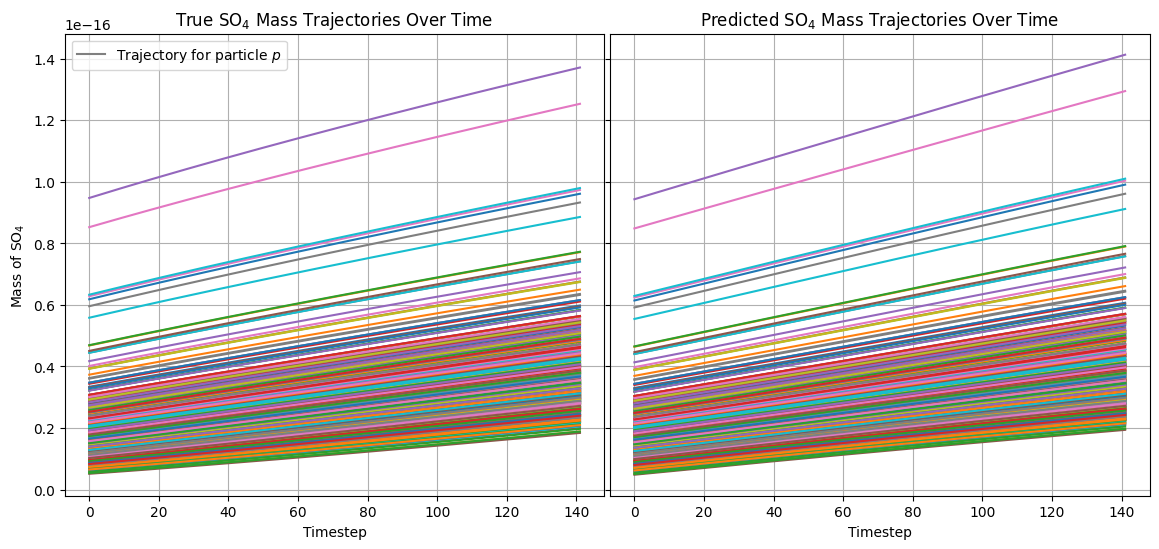

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['SO4'])
ax2.plot(pred_x['SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of SO$_4$')

ax1.set_title('True SO$_4$ Mass Trajectories Over Time')
ax2.set_title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("so4rep4.png")

In [68]:
ar.nmae(true_x['SO4'], pred_x['SO4'])

0.01021749079228173

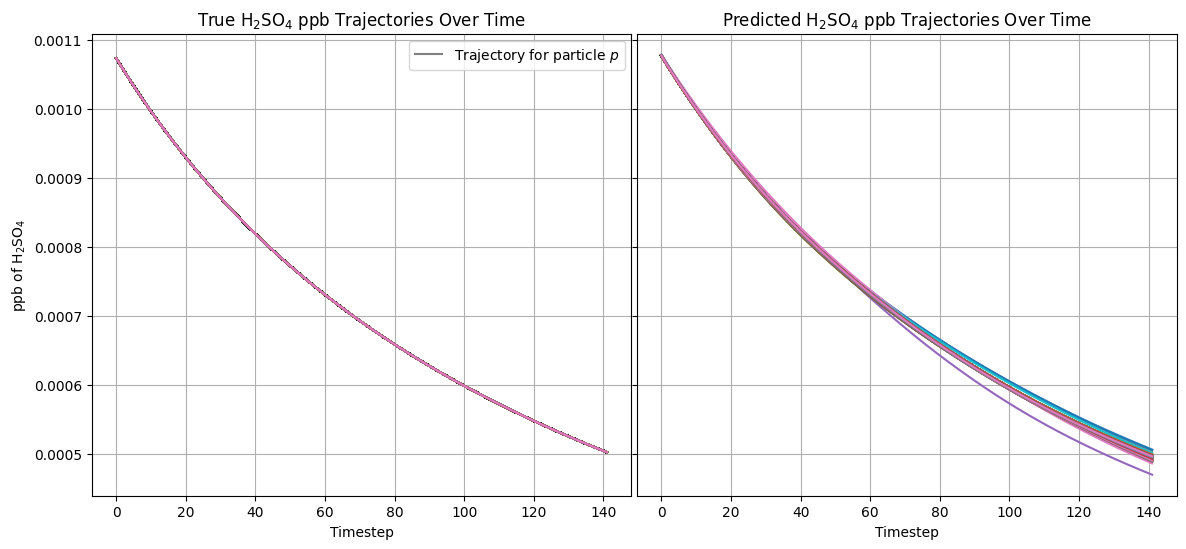

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2SO4'])
ax2.plot(pred_x['H2SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('ppb of H$_2$SO$_4$')

ax1.set_title('True H$_2$SO$_4$ ppb Trajectories Over Time')
ax2.set_title('Predicted H$_2$SO$_4$ ppb Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper right', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2so4rep4.png")

In [70]:
ar.nmae(true_x['H2SO4'], pred_x['H2SO4'])

0.00494975427579154

In [71]:
true_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': true_x['SO4']}

In [72]:
pred_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': pred_x['SO4']}

In [73]:
so4_diam = ar.gd_from_vol(ar.volume('SO4', true_dry_mass))

In [74]:
pred_so4_diam = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass))

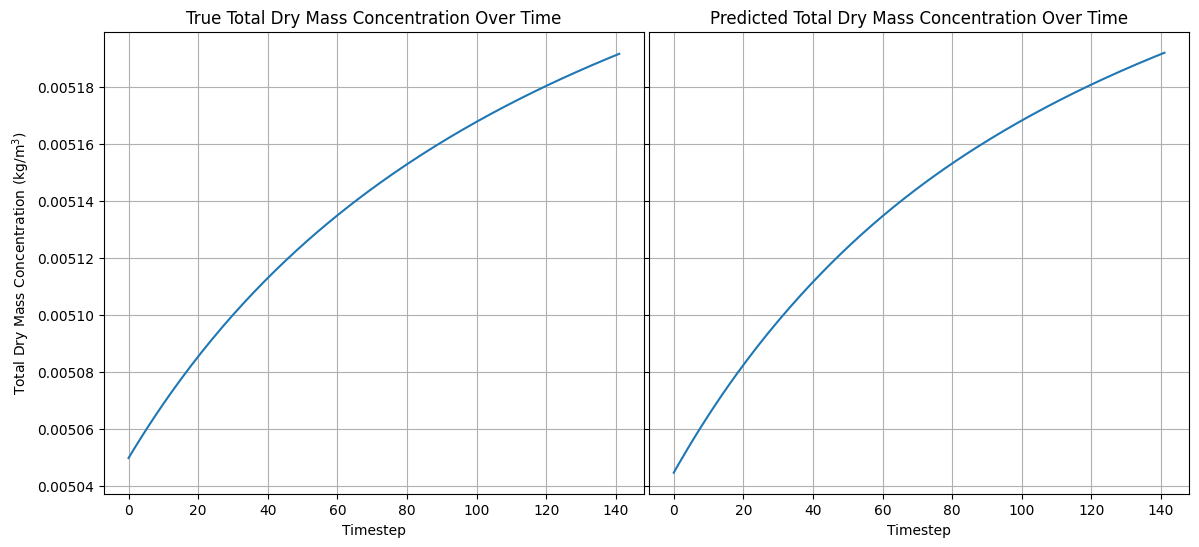

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))
ax2.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Total Dry Mass Concentration (kg/m$^3$)')

ax1.set_title('True Total Dry Mass Concentration Over Time')
ax2.set_title('Predicted Total Dry Mass Concentration Over Time')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("dm_conc_rep4.png")

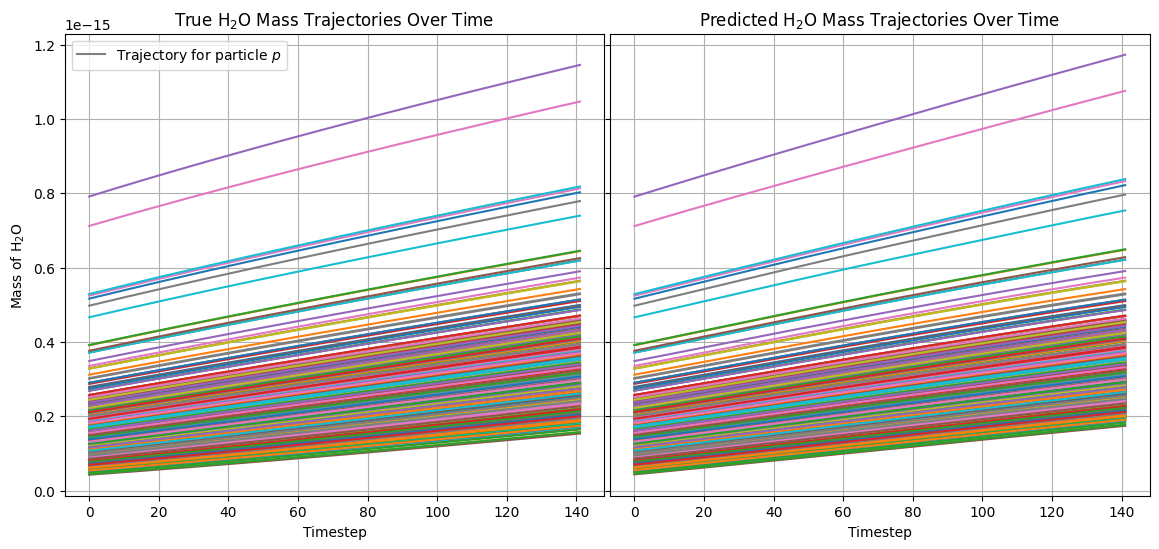

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2O'])
ax2.plot(pred_x['H2O'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of H$_2$O')

ax1.set_title('True H$_2$O Mass Trajectories Over Time')
ax2.set_title('Predicted H$_2$O Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2orep4.png")

In [77]:
ar.nmae(true_x['H2O'], pred_x['H2O'])

0.02009350042875305

In [78]:
total_true_drymass = sum(true_dry_mass.values())

In [79]:
total_pred_drymass = sum(pred_dry_mass.values())

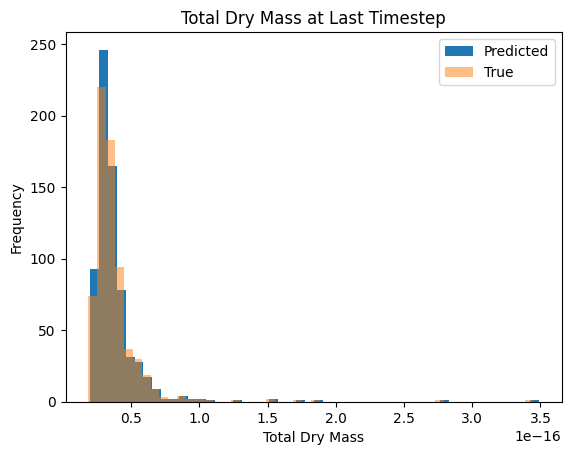

In [80]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50, label="Predicted")
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Total Dry Mass')
plt.ylabel('Frequency')
plt.title('Total Dry Mass at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dm_hist_rep4.png")

In [81]:
true_Ddry = ar.gd_from_vol(ar.volume('SO4', true_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [82]:
pred_Ddry = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

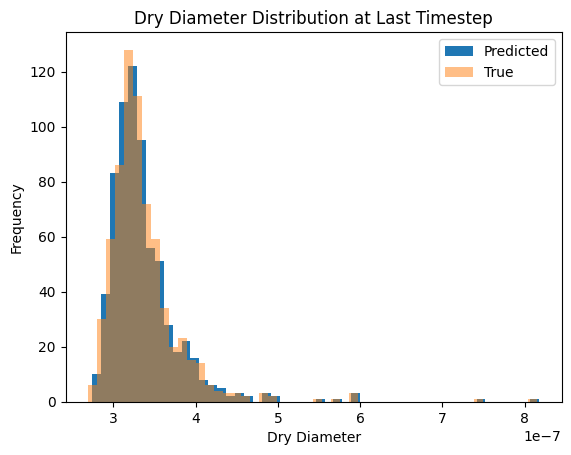

In [ ]:
fig, ax = plt.subplots()
ax.hist(pred_Ddry[-1,:], bins=50, label="Predicted")
ax.hist(true_Ddry[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Dry Diameter')
plt.ylabel('Frequency')
plt.title('Dry Diameter Distribution at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dd_hist_rep4.png")